In [15]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [4]:
df = pd.read_csv('data/IT Salary Survey EU 2018.csv')
df.head()

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Salary two years ago,Are you getting any Stock Options?,Main language at work,Company size,Company type
0,14/12/2018 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,68000.0,No,Deutsch,100-1000,Product
1,14/12/2018 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,55000.0,No,Deutsch,50-100,Product
2,14/12/2018 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,73000.0,54000.0,No,Deutsch,1000+,Product
3,14/12/2018 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,45000.0,Yes,English,1000+,Product
4,14/12/2018 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,60000.0,52000.0,No,English,100-1000,Ecom retailer


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           765 non-null    object 
 1   Age                                 672 non-null    float64
 2   Gender                              751 non-null    object 
 3   City                                736 non-null    object 
 4   Position                            737 non-null    object 
 5   Years of experience                 732 non-null    float64
 6   Your level                          743 non-null    object 
 7   Current Salary                      750 non-null    float64
 8   Salary one year ago                 596 non-null    float64
 9   Salary two years ago                463 non-null    float64
 10  Are you getting any Stock Options?  742 non-null    object 
 11  Main language at work               750 non-n

In [7]:
(df.isna().sum() / df.shape[0]) * 100

Timestamp                              0.000000
Age                                   12.156863
Gender                                 1.830065
City                                   3.790850
Position                               3.660131
Years of experience                    4.313725
Your level                             2.875817
Current Salary                         1.960784
Salary one year ago                   22.091503
Salary two years ago                  39.477124
Are you getting any Stock Options?     3.006536
Main language at work                  1.960784
Company size                           1.960784
Company type                           4.575163
dtype: float64

About 40% of values in Salary two years ago are missing and 22% of values in Salary one year ago is missing. The other columns have about 1-4% of missing values.

In [8]:
df.describe()

,Age,Years of experience,Current Salary,Salary one year ago,Salary two years ago
count,672.000000,732.000000,750.000000,596.000000,463.000000
mean,32.183036,8.548497,68381.765333,62187.278523,58013.475162
std,5.107268,4.729557,21196.306557,20163.008663,20413.048908
min,21.000000,0.000000,10300.000000,10001.000000,10001.000000
25%,29.000000,5.000000,57000.000000,52000.000000,48000.000000
50%,32.000000,8.000000,65000.000000,60000.000000,56000.000000
75%,35.000000,11.000000,75000.000000,70000.000000,67000.000000
max,60.000000,38.000000,200000.000000,200000.000000,150000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           765 non-null    object 
 1   Age                                 672 non-null    float64
 2   Gender                              751 non-null    object 
 3   City                                736 non-null    object 
 4   Position                            737 non-null    object 
 5   Years of experience                 732 non-null    float64
 6   Your level                          743 non-null    object 
 7   Current Salary                      750 non-null    float64
 8   Salary one year ago                 596 non-null    float64
 9   Salary two years ago                463 non-null    float64
 10  Are you getting any Stock Options?  742 non-null    object 
 11  Main language at work               750 non-n

# Univariate Exploration

## Spread of Age

In [11]:
df['Age'].describe()

count    672.000000
mean      32.183036
std        5.107268
min       21.000000
25%       29.000000
50%       32.000000
75%       35.000000
max       60.000000
Name: Age, dtype: float64

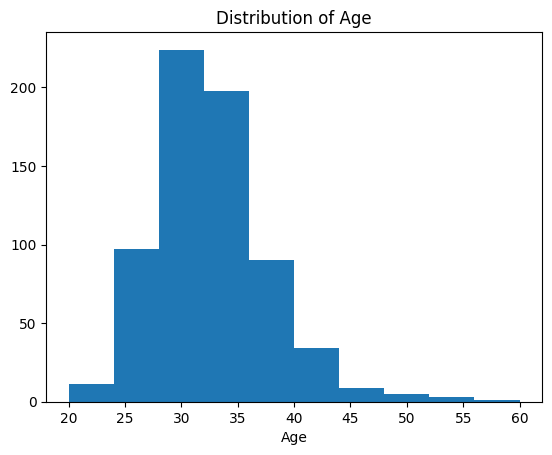

In [20]:
bins = np.arange(20,df['Age'].max()+1,4)
plt.hist(x='Age',data=df,bins=bins)
plt.xlabel('Age')
plt.title('Distribution of Age');

It is skewed to the right, with majority of IT professionals in the age bracket of 25-40, with a peak at around 28-37.
## Distribution of gender

In [22]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position', 'Years of experience',
       'Your level', 'Current Salary', 'Salary one year ago',
       'Salary two years ago', 'Are you getting any Stock Options?',
       'Main language at work', 'Company size', 'Company type'],
      dtype='object')

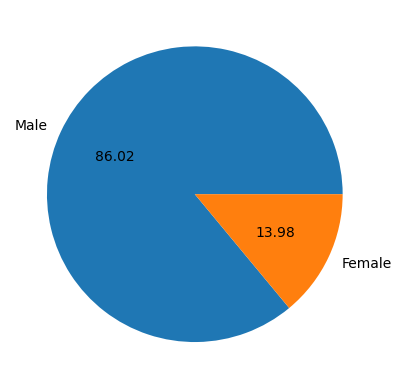

In [31]:
gender_counts = df['Gender'].value_counts()
gender_counts.index = ['Male','Female']
plt.pie(gender_counts,labels=gender_counts.index,autopct="%.2f");

Males are the majority with 14% of the people in the dataset being female.
## City, Position, Years of Experience, Current Level

In [38]:
df['City'].value_counts().iloc[:8]

City
Berlin       291
München      249
Frankfurt     33
Köln          20
Hamburg       16
Stuttgart     15
Amsterdam     15
Karlsruhe      4
Name: count, dtype: int64

Majority of the respondents work in Berlin and Munchen.

In [44]:
df['Position'].value_counts().iloc[:10]

Position
Java Developer              34
Software Engineer           29
Senior Software Engineer    16
QA                          15
Software Developer          13
Frontend Developer          13
iOS Developer               12
DevOps                      11
Data Scientist              11
Senior Java Developer        8
Name: count, dtype: int64

In [55]:
df['Years of experience'].describe()

count    732.000000
mean       8.548497
std        4.729557
min        0.000000
25%        5.000000
50%        8.000000
75%       11.000000
max       38.000000
Name: Years of experience, dtype: float64

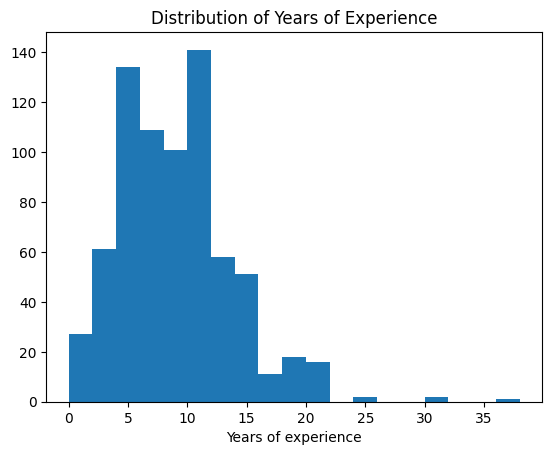

In [61]:
bins = np.arange(0,df['Years of experience'].max()+1,2)
plt.hist(x='Years of experience',data=df,bins=bins)
plt.xlabel('Years of experience')
plt.title("Distribution of Years of Experience");

Years of Experience is right skewed with IT specialists in this dataset having an average of 5-12 years of experience. There are respondents who have more than 25 years of experience.

In [93]:
df[df['Years of experience']>=25]

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Salary two years ago,Are you getting any Stock Options?,Main language at work,Company size,Company type
339,15/12/2018 16:05:51,42.0,M,Berlin,Head of Engineering,25.0,Senior,140000.0,130000.0,130000.0,Yes,English,1000+,Product
453,17/12/2018 18:35:33,NaN,M,Berlin,ios вумудщзук,30.0,Senior,65000.0,56000.0,47000.0,No,English,50-100,Startup
548,19/12/2018 11:17:07,60.0,F,München,PL SQL / C#,38.0,NaN,58000.0,58000.0,58000.0,No,Deutsch,up to 10,Product
746,09/08/2019 11:53:32,51.0,M,Oberhausen,Sr. Database Entwickler (Oracle/Java),25.0,Senior,78000.0,76500.0,75000.0,No,Deutsch,100-1000,Product
756,05/03/2020 16:50:43,52.0,M,Köln,IT Engineer,30.0,Middle,63000.0,80000.0,80000.0,No,English,1000+,Agency


In [65]:
(df['Your level'].value_counts() / df.shape[0])*100

Your level
Senior    64.967320
Middle    26.928105
Junior     5.228758
Name: count, dtype: float64

65% of the respondents are senior level, 26% for middle level and juniors accounting for 5% of the respondents.

In [69]:
df['Current Salary'].describe()

count       750.000000
mean      68381.765333
std       21196.306557
min       10300.000000
25%       57000.000000
50%       65000.000000
75%       75000.000000
max      200000.000000
Name: Current Salary, dtype: float64

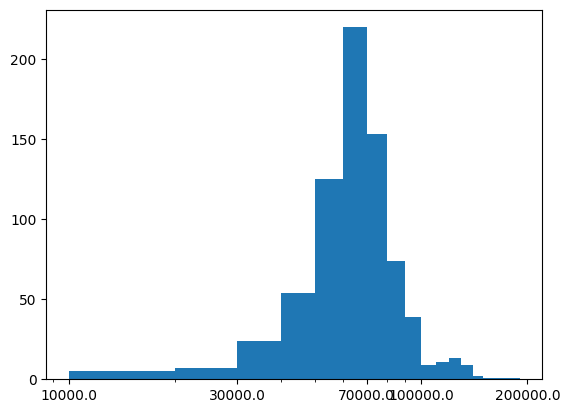

In [82]:
bins = np.arange(10000,df['Current Salary'].max(),10000)
ticks = [1e4,3e4,7e4,1e5,2e5]
labels =  ['{}'.format(b) for b in ticks]
plt.hist(x='Current Salary',data=df,bins=bins)
plt.xscale('log')
plt.xticks(ticks,labels);

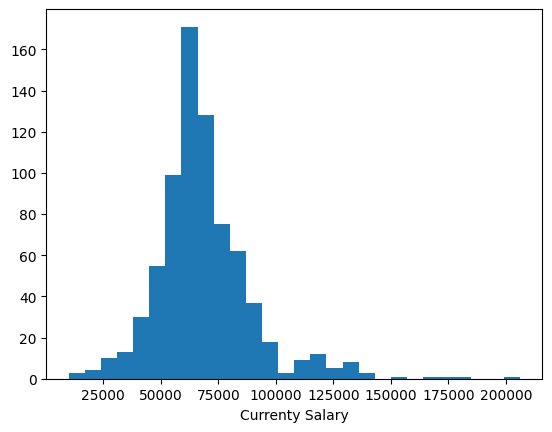

In [86]:
bins = np.arange(10000,df['Current Salary'].max()+7000,7000)
plt.hist(x='Current Salary',data=df,bins=bins)
plt.xlabel('Currenty Salary');

On average,respondents said they are paid about 50,000-80,0000. We have outliers who reported they are paid 150,000!.

In [91]:
df[df['Current Salary']>=150000.0]['Position']

187    SAP Consultant
298               CEO
519               NaN
576      It security 
613               NaN
Name: Position, dtype: object

The outliers work as a SAP Consultant, CEO or are in IT security.

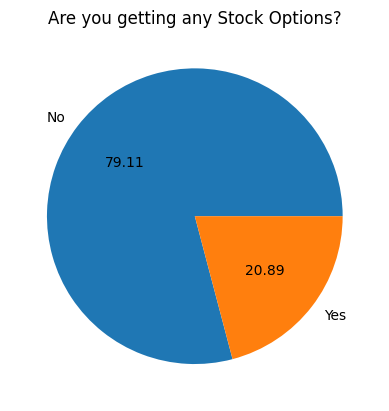

In [100]:
stock_options_count = df['Are you getting any Stock Options?'].value_counts()
plt.pie(stock_options_count,labels=stock_options_count.index,autopct='%2.2f')
plt.title("Are you getting any Stock Options?");

79% of the respondents said they aren't getting any stock options in the company while 21% said they are getting stock options

In [102]:
df['Main language at work'].value_counts()

Main language at work
English                                  581
Deutsch                                  134
Russian                                   29
French                                     2
Polish                                     2
Team - Russian; Cross-team - English;      1
Deutsch/Englisch                           1
Name: count, dtype: int64

Respondents majorly used English with Deutsch being the other common language at work.

In [105]:
df['Company size'].value_counts()

Company size
100-1000    260
1000+       219
50-100      120
10-50       117
up to 10     34
Name: count, dtype: int64

In [108]:
df['Company type'].value_counts()[:10]

Company type
Product        451
Startup        145
Agency          74
Outsource        5
Consulting       5
Outsourcing      3
Consultancy      2
Corporation      2
Automotive       2
Insurance        2
Name: count, dtype: int64

Respondents reported they majorly worked for Startups, Product based companies and Agencies

# Bivariate Exploration
## Age and Years of Experience

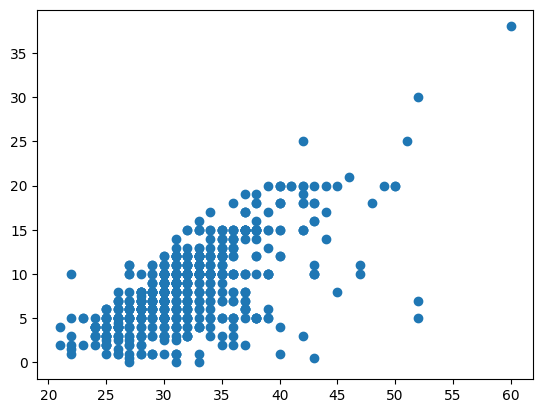

In [110]:
plt.scatter(x='Age',data=df,y='Years of experience')

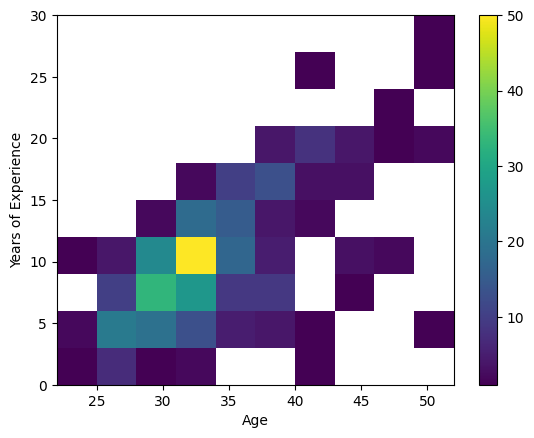

In [130]:
plt.hist2d(x='Age',y='Years of experience',data=df.dropna(),cmap='viridis',cmin=1,bins=10)
plt.xlabel('Age')
plt.ylabel('Years of Experience')
plt.colorbar();

There is a concentration of respondents who are aged 32-34 that have 10-12 years of experience. Unsuprisingly age and years of experience are positive linearly correlated. 

## Relationship of current salary with other columns

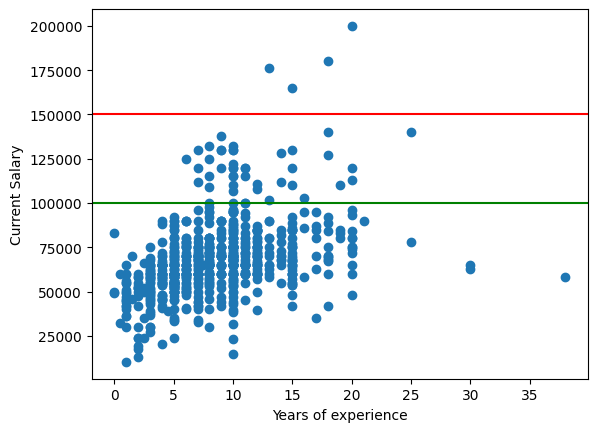

In [170]:
plt.scatter(x='Years of experience',y='Current Salary',data=df)
plt.axhline(y=150000,color='r')
plt.axhline(y=100000,color='green')
plt.xlabel('Years of experience')
plt.ylabel('Current Salary');

There are outliers in this dataset who have high years of experience but with the same salary as someone with 2 years of experience. I have plotted 2 lines to segment the graph into 3 parts; Respondents who are earning the highest (150,000-200,000) have 12-20 years of experience, the second segments contains respondents earning 100,000 - 150,000 have 6-25 years of experience.

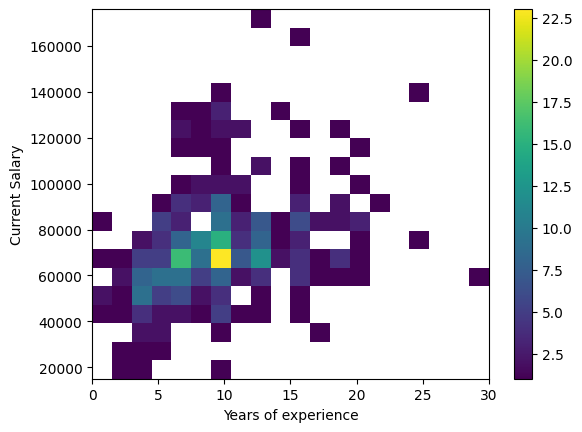

In [175]:
plt.hist2d(x='Years of experience',y='Current Salary',data=df.dropna(),cmin=1.0,bins=20)
plt.xlabel('Years of experience')
plt.ylabel('Current Salary')
plt.colorbar();

There is a high concentration of respondents who have 10 years of experience and earn 62,000-70,000.

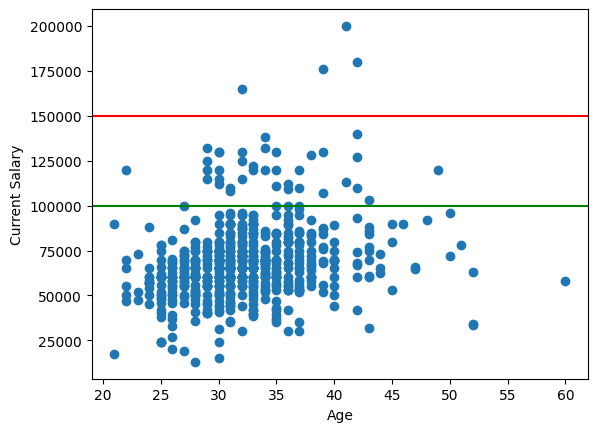

In [176]:
plt.scatter(x='Age',y='Current Salary',data=df)
plt.xlabel('Age')
plt.ylabel('Current Salary')
plt.axhline(y=150000,color='r')
plt.axhline(y=100000,color='green');

Using the same lines at 150,000 and 100,000 we see the first group are in between the 33-44 age bracket. In the second group we see an outlier who earns ~125,000 and is 23 years old!. 

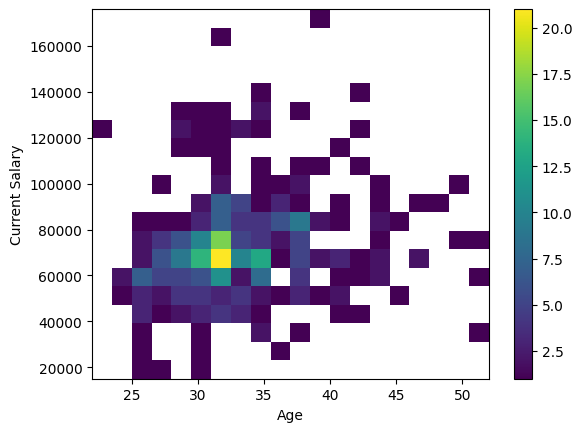

In [180]:
plt.hist2d(x='Age',y='Current Salary',data=df.dropna(),cmin=1.0,bins=20)
plt.xlabel('Age')
plt.ylabel('Current Salary')
plt.colorbar();

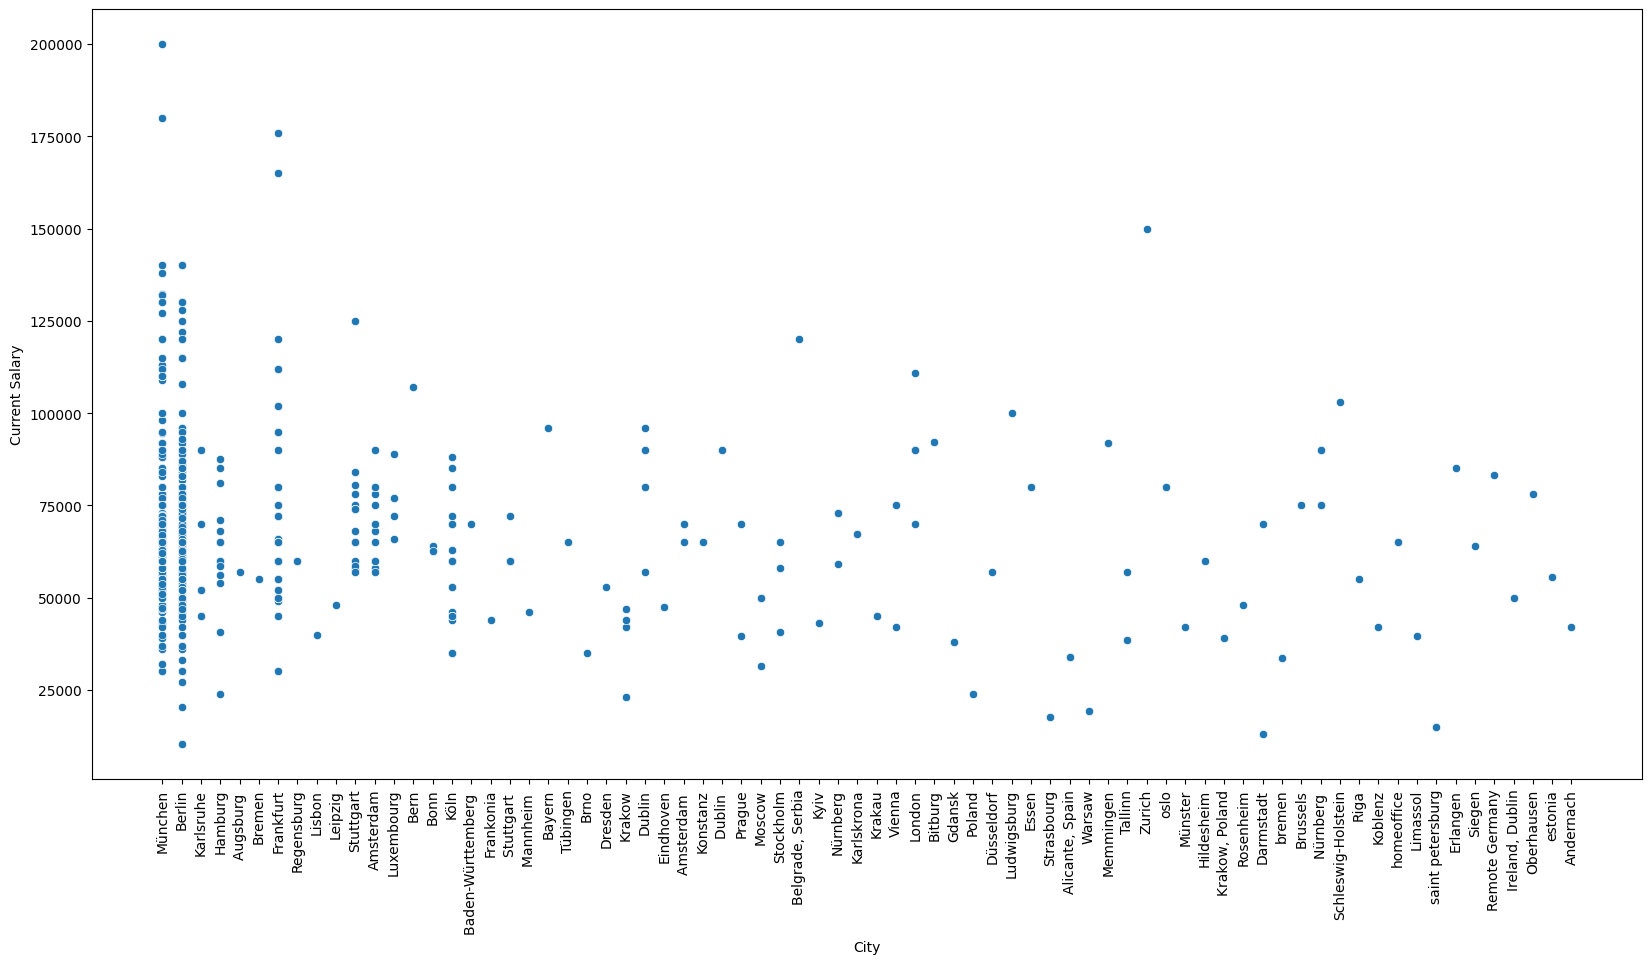

In [206]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='City',y='Current Salary',data=df)
plt.xticks(rotation=90);

Majority of the respondents are from Munchen and Berlin so there is a concentration of dots on those cities. Respondents with lower salary are from Saint Petersburg, Berlin and Darmstadt while respondents in Munchen and Frankfurt reported higher salaries.

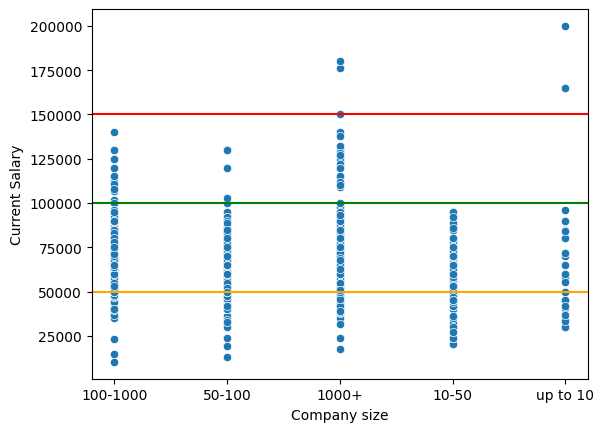

In [214]:
company_order = ['up to 10','10-50','50-100','100-1000','1000+']
sns.scatterplot(x='Company size',y='Current Salary',data=df)
plt.axhline(150000,color='red',)
plt.axhline(100000,color='green')
plt.axhline(50000, color='orange');

Outliers with more than 150,000 as salary claimed the company they worked for were either had more 1000+ employees or only up to 10 employees. 
The second group of respondents who are paid between 100,000 to 150,000 worked for company with employee size of from 100 to more than 1000+. Outliers in the company size 50-100 also fall in this group.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Product'),
  Text(1, 0, 'Startup'),
  Text(2, 0, 'Agency'),
  Text(3, 0, 'Consultancy'),
  Text(4, 0, 'Outsource'),
  Text(5, 0, 'Consulting'),
  Text(6, 0, 'Outsourcing')])

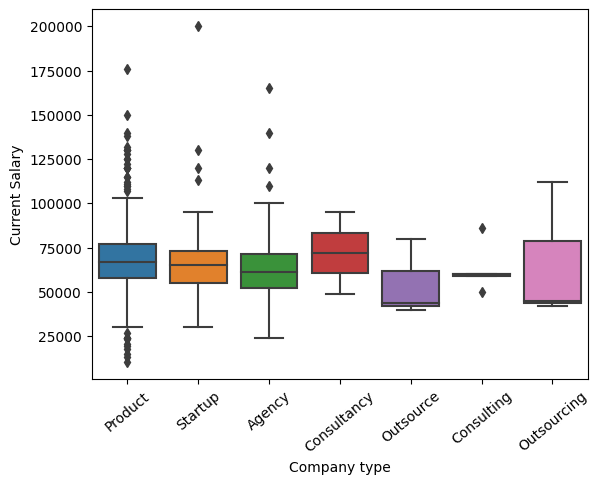

In [231]:
company_types = df['Company type'].value_counts().iloc[:7].index 
subset_df = df[df['Company type'].isin(company_types)]
sns.boxplot(x='Company type',y='Current Salary',data=subset_df)
plt.xticks(rotation=40)
# plt.axhline(150000,color='red',)
# plt.axhline(100000,color='green')
# plt.axhline(50000, color='orange');

Product based companies had the most varied responds with respondents claiming they were paid less than 25,000 to more 125,000. Highly paid outliers were from product based companies, agencies and startups.